In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import process
import plot

### Load Raw Data

In [2]:
gbm_cells_raw = pd.read_excel('data/f114_dose-response_gbm-cells.xlsx', header=None)
astrocytes_raw = pd.read_excel('data/f114_dose-response_astrocytes.xlsx', header=None)

### Process Data

In [3]:
dilutions = process.serial_dilution(0.00005, 0.666, 17)
cols = dilutions + ['dmso', 'velcade']

In [4]:
gbm6 = gbm_cells_raw.iloc[0:3,1:19]
gbm22 = gbm_cells_raw.iloc[3:6,1:19]
ln18 = gbm_cells_raw.iloc[6:9,1:19]
ln229 = gbm_cells_raw.iloc[9:12,1:19]

gbm_cell_lines = [gbm22, ln229, ln18, gbm6]
gbm_cell_lines_key = ['GBM22', 'LN229', 'LN18','GBM6']

for cell_line in gbm_cell_lines:
    cell_line.columns = cols
    
astrocytes = astrocytes_raw.iloc[12:15,1:19]
astrocytes.columns = cols
astrocytes_cell_lines_key = ['Astrocytes']

In [5]:
gbm_cell_lines_norm = [process.normalize_lowest_and_reorder(cell_line) for cell_line in gbm_cell_lines]
astrocytes_norm = process.normalize_lowest_and_reorder(astrocytes)

### Fit Curve

<Figure size 432x288 with 0 Axes>

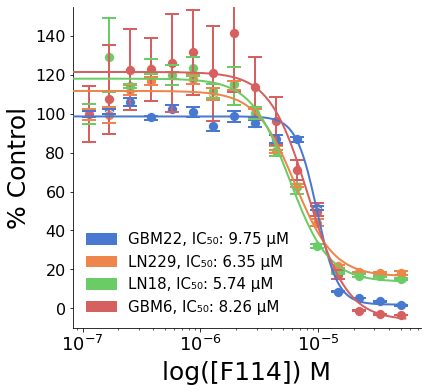

In [6]:
plot.fit(gbm_cell_lines_norm, label=gbm_cell_lines_key, color=plot.Curve().colors)
# plt.savefig('figures/dose-response_gbm-cell-lines.pdf')

<Figure size 432x288 with 0 Axes>

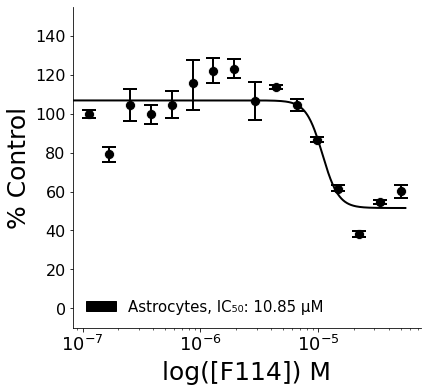

In [7]:
plot.fit(astrocytes_norm, label=astrocytes_cell_lines_key, color=['black'])
# plt.savefig('figures/dose-response_astrocytes.pdf')